In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurazione per grafici più belli
plt.style.use('default')
sns.set_palette("tab10")

print("=== CPU METHODS SCALING ANALYSIS ===")
print("Analisi del parallelismo e scaling dei metodi CPU")
print("Focus su: Thread Scalability, Method Comparison, Efficiency Analysis")

# Carica i dati
try:
    df = pd.read_csv('benchmark_results_CPU_methods.csv')
    print(f"✅ CPU Methods data caricati: {len(df)} configurazioni")
    
    # Filtra solo test riusciti
    df = df[df['Success'] == True]
    
    print(f"Range particelle: {df['NumParticles'].min():,} - {df['NumParticles'].max():,}")
    print(f"Range threads: {df['NumThreads'].min()} - {df['NumThreads'].max()}")
    
    # Mostra metodi disponibili
    methods = df.groupby(['ForceMethod', 'IntegrationMethod']).size()
    print(f"\nMetodi disponibili:")
    for (force, integration), count in methods.items():
        print(f"  {force} + {integration}: {count} configurazioni")
    
    # Controllo completeness
    total_configs = len(df['NumParticles'].unique()) * len(df['NumThreads'].unique()) * len(methods)
    completeness = len(df) / total_configs * 100
    print(f"Completeness: {completeness:.1f}% ({len(df)}/{total_configs})")
    
    data_available = True
    
except FileNotFoundError as e:
    print(f"❌ Errore caricamento dati: {e}")
    data_available = False

if data_available:
    print("✅ Dataset CPU methods caricato con successo!")
    print("🎯 Focus: Thread scalability e confronto metodi")
else:
    print("❌ Impossibile procedere senza i dati")

=== CPU METHODS SCALING ANALYSIS ===
Analisi del parallelismo e scaling dei metodi CPU
Focus su: Thread Scalability, Method Comparison, Efficiency Analysis
✅ CPU Methods data caricati: 408 configurazioni
Range particelle: 2 - 50,000
Range threads: 1 - 8

Metodi disponibili:
  ADAPTIVE_MUTUAL + VELOCITY_VERLET: 136 configurazioni
  BARNES_HUT + VELOCITY_VERLET: 136 configurazioni
  PAIRWISE_AVX2/FP32 + VELOCITY_VERLET: 136 configurazioni
Completeness: 100.0% (408/408)
✅ Dataset CPU methods caricato con successo!
🎯 Focus: Thread scalability e confronto metodi


In [8]:
# Analisi preliminare dei metodi
if data_available:
    print("=== ANALISI PRELIMINARE METODI ===")
    
    # Raggruppa i metodi principali
    force_methods = df['ForceMethod'].unique()
    integration_methods = df['IntegrationMethod'].unique()
    
    print(f"Force Methods: {list(force_methods)}")
    print(f"Integration Methods: {list(integration_methods)}")
    
    # Crea combinazioni principali per l'analisi
    main_combinations = []
    for force in force_methods:
        for integration in integration_methods:
            combo_data = df[(df['ForceMethod'] == force) & (df['IntegrationMethod'] == integration)]
            if len(combo_data) >= 10:  # Soglia minima per analisi significativa
                main_combinations.append((force, integration))
    
    print(f"\nCombinazioni per analisi completa: {len(main_combinations)}")
    for force, integration in main_combinations:
        combo_data = df[(df['ForceMethod'] == force) & (df['IntegrationMethod'] == integration)]
        particles_tested = sorted(combo_data['NumParticles'].unique())
        threads_tested = sorted(combo_data['NumThreads'].unique())
        print(f"  {force}+{integration}: {len(combo_data)} configs, "
              f"particles {particles_tested[0]}-{particles_tested[-1]}, "
              f"threads {threads_tested[0]}-{threads_tested[-1]}")
    
    # Identifica il range più completo per l'analisi
    particle_counts = df['NumParticles'].value_counts().sort_index()
    thread_counts = df['NumThreads'].value_counts().sort_index()
    
    print(f"\nDistribuzione test per particelle:")
    for particles, count in particle_counts.items():
        print(f"  {particles:>6,} particles: {count:>3} configurazioni")
    
    print(f"\nDistribuzione test per threads:")
    for threads, count in thread_counts.items():
        print(f"  {threads:>2} threads: {count:>3} configurazioni")

=== ANALISI PRELIMINARE METODI ===
Force Methods: ['PAIRWISE_AVX2/FP32', 'ADAPTIVE_MUTUAL', 'BARNES_HUT']
Integration Methods: ['VELOCITY_VERLET']

Combinazioni per analisi completa: 3
  PAIRWISE_AVX2/FP32+VELOCITY_VERLET: 136 configs, particles 2-50000, threads 1-8
  ADAPTIVE_MUTUAL+VELOCITY_VERLET: 136 configs, particles 2-50000, threads 1-8
  BARNES_HUT+VELOCITY_VERLET: 136 configs, particles 2-50000, threads 1-8

Distribuzione test per particelle:
       2 particles:  24 configurazioni
       5 particles:  24 configurazioni
       8 particles:  24 configurazioni
      10 particles:  24 configurazioni
      25 particles:  24 configurazioni
      50 particles:  24 configurazioni
     100 particles:  24 configurazioni
     250 particles:  24 configurazioni
     500 particles:  24 configurazioni
     750 particles:  24 configurazioni
   1,000 particles:  24 configurazioni
   2,500 particles:  24 configurazioni
   5,000 particles:  24 configurazioni
   7,500 particles:  24 configurazion


=== GRAFICO 1: THREAD SCALABILITY ===

PAIRWISE_AVX2/FP32 + VELOCITY_VERLET:
  1,000 particles: max 3.61x speedup (8 threads)
  Efficienza massima: 45.1%

ADAPTIVE_MUTUAL + VELOCITY_VERLET:
  1,000 particles: max 4.67x speedup (8 threads)
  Efficienza massima: 58.3%

BARNES_HUT + VELOCITY_VERLET:
  1,000 particles: max 2.33x speedup (4 threads)
  Efficienza massima: 58.3%


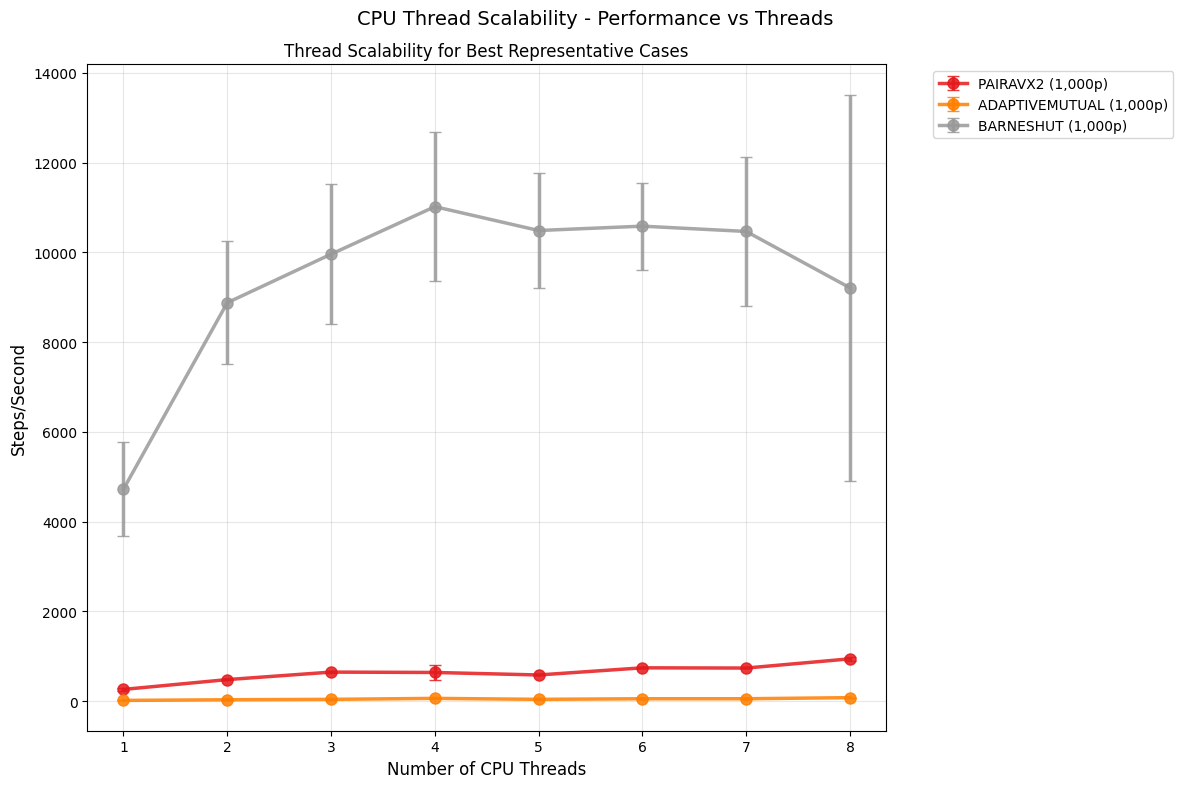


=== GRAFICO 2: THREADING EFFICIENCY ===
PAIRWISE_AVX2/FP32: efficiency range 43.7% - 100.0%
ADAPTIVE_MUTUAL: efficiency range 53.4% - 100.0%
BARNES_HUT: efficiency range 42.1% - 100.0%


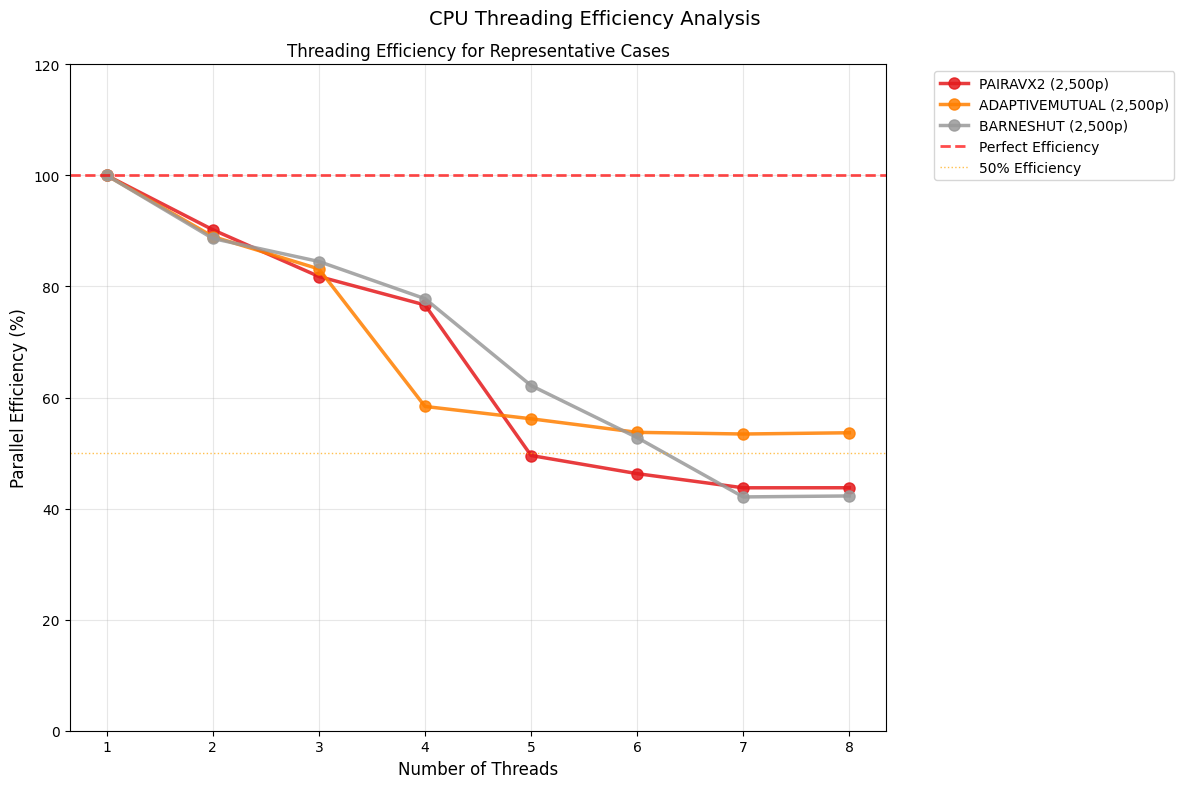


=== GRAFICO 3: METHODS AT OPTIMAL THREADS ===
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 1,000p: 943 steps/sec (8T)
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 2,500p: 154 steps/sec (8T)
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 5,000p: 41 steps/sec (8T)
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 10,000p: 11 steps/sec (8T)
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 25,000p: 2 steps/sec (8T)
ADAPTIVE_MUTUAL+VELOCITY_VERLET, 1,000p: 78 steps/sec (8T)
ADAPTIVE_MUTUAL+VELOCITY_VERLET, 2,500p: 12 steps/sec (8T)
ADAPTIVE_MUTUAL+VELOCITY_VERLET, 5,000p: 3 steps/sec (8T)
ADAPTIVE_MUTUAL+VELOCITY_VERLET, 10,000p: 1 steps/sec (8T)
ADAPTIVE_MUTUAL+VELOCITY_VERLET, 25,000p: 0 steps/sec (8T)
BARNES_HUT+VELOCITY_VERLET, 1,000p: 11017 steps/sec (4T)
BARNES_HUT+VELOCITY_VERLET, 2,500p: 1243 steps/sec (8T)
BARNES_HUT+VELOCITY_VERLET, 5,000p: 654 steps/sec (8T)
BARNES_HUT+VELOCITY_VERLET, 10,000p: 318 steps/sec (5T)
BARNES_HUT+VELOCITY_VERLET, 25,000p: 44 steps/sec (8T)


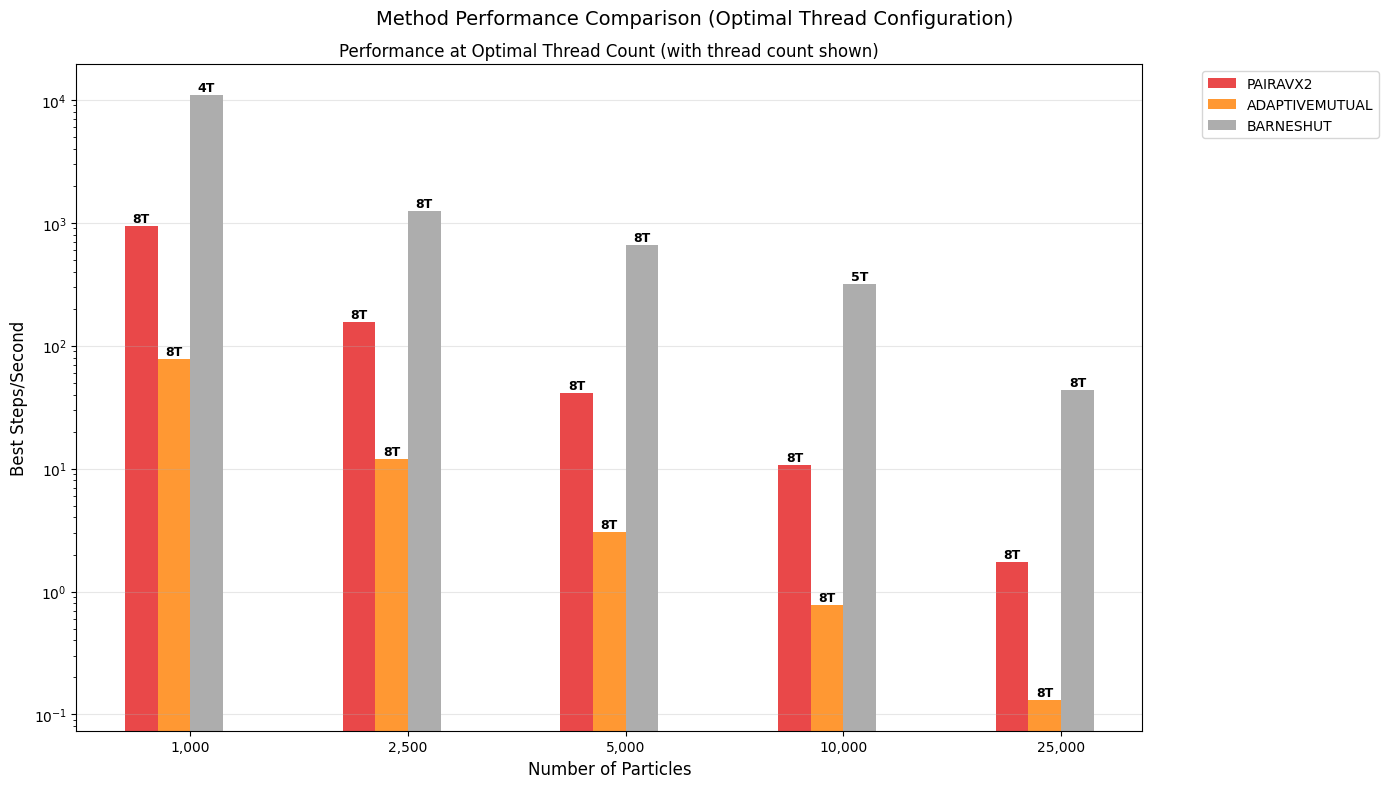

✅ Tutti e 3 i grafici di thread scalability completati con dati reali!


In [13]:
# 1. THREAD SCALABILITY ANALYSIS - CORRETTO
if data_available and len(main_combinations) > 0:
    
    # Crea 3 grafici separati come richiesto
    fig1, ax1 = plt.subplots(1, 1, figsize=(12, 8))
    fig1.suptitle('CPU Thread Scalability - Performance vs Threads', fontsize=14)
    
    print("\n=== GRAFICO 1: THREAD SCALABILITY ===")
    
    # Seleziona i migliori metodi con dati sufficienti
    best_methods = []
    for force_method, int_method in main_combinations:
        method_data = df[(df['ForceMethod'] == force_method) & 
                         (df['IntegrationMethod'] == int_method)]
        if len(method_data) >= 10:  # Almeno 10 configurazioni
            best_methods.append((force_method, int_method))
    
    # Usa solo i primi 3-4 metodi migliori per chiarezza
    colors = plt.cm.Set1(np.linspace(0, 1, len(best_methods[:4])))
    
    for idx, ((force_method, int_method), color) in enumerate(zip(best_methods[:4], colors)):
        method_data = df[(df['ForceMethod'] == force_method) & 
                         (df['IntegrationMethod'] == int_method)]
        
        print(f"\n{force_method} + {int_method}:")
        
        # Scegli un numero di particelle rappresentativo con buoni dati
        best_particles = None
        max_data_points = 0
        
        for particles in [1000, 2500, 5000, 10000, 25000]:
            particle_data = method_data[method_data['NumParticles'] == particles]
            if len(particle_data) > max_data_points:
                max_data_points = len(particle_data)
                best_particles = particles
        
        if best_particles and max_data_points >= 3:
            particle_data = method_data[method_data['NumParticles'] == best_particles]
            particle_data_sorted = particle_data.sort_values('NumThreads')
            
            # Plot dei dati reali
            ax1.errorbar(particle_data_sorted['NumThreads'], 
                        particle_data_sorted['MeanStepsPerSecond'],
                        yerr=particle_data_sorted['StdStepsPerSecond'] if 'StdStepsPerSecond' in particle_data_sorted.columns else None,
                        fmt='o-', label=f'{force_method.replace("_", "").replace("PAIRWISE", "PAIR").replace("AVX2/FP32", "AVX2")} ({best_particles:,}p)', 
                        color=color, linewidth=2.5, markersize=8, capsize=4, alpha=0.85)
            
            # Analisi speedup vs single thread
            baseline = particle_data_sorted[particle_data_sorted['NumThreads'] == 1]['MeanStepsPerSecond']
            if not baseline.empty:
                baseline_perf = baseline.iloc[0]
                max_perf = particle_data_sorted['MeanStepsPerSecond'].max()
                max_threads = particle_data_sorted.loc[particle_data_sorted['MeanStepsPerSecond'].idxmax(), 'NumThreads']
                thread_speedup = max_perf / baseline_perf
                print(f"  {best_particles:,} particles: max {thread_speedup:.2f}x speedup ({max_threads} threads)")
                
                # Efficienza a massimi thread
                efficiency = (thread_speedup / max_threads) * 100
                print(f"  Efficienza massima: {efficiency:.1f}%")
    
    ax1.set_xlabel('Number of CPU Threads', fontsize=12)
    ax1.set_ylabel('Steps/Second', fontsize=12)
    ax1.set_title('Thread Scalability for Best Representative Cases', fontsize=12)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # GRAFICO 2: Efficiency vs Threads
    fig2, ax2 = plt.subplots(1, 1, figsize=(12, 8))
    fig2.suptitle('CPU Threading Efficiency Analysis', fontsize=14)
    
    print("\n=== GRAFICO 2: THREADING EFFICIENCY ===")
    
    for idx, ((force_method, int_method), color) in enumerate(zip(best_methods[:3], colors)):
        method_data = df[(df['ForceMethod'] == force_method) & 
                         (df['IntegrationMethod'] == int_method)]
        
        # Prendi il miglior caso per particles per questo metodo
        best_particles = None
        max_data_points = 0
        
        for particles in [2500, 5000, 10000]:
            particle_data = method_data[method_data['NumParticles'] == particles]
            if len(particle_data) > max_data_points:
                max_data_points = len(particle_data)
                best_particles = particles
        
        if best_particles and max_data_points >= 4:
            particle_data = method_data[method_data['NumParticles'] == best_particles]
            particle_data_sorted = particle_data.sort_values('NumThreads')
            
            # Calcola parallel efficiency
            baseline = particle_data_sorted[particle_data_sorted['NumThreads'] == 1]['MeanStepsPerSecond']
            if not baseline.empty:
                baseline_perf = baseline.iloc[0]
                
                efficiencies = []
                thread_counts = []
                
                for _, row in particle_data_sorted.iterrows():
                    threads = row['NumThreads']
                    if threads > 0:
                        actual_speedup = row['MeanStepsPerSecond'] / baseline_perf
                        efficiency = (actual_speedup / threads) * 100  # Percentage
                        
                        if efficiency <= 200:  # Filtro valori anomali
                            efficiencies.append(efficiency)
                            thread_counts.append(threads)
                
                if len(efficiencies) >= 3:
                    ax2.plot(thread_counts, efficiencies, 'o-', 
                            label=f'{force_method.replace("_", "").replace("PAIRWISE", "PAIR").replace("AVX2/FP32", "AVX2")} ({best_particles:,}p)',
                            color=color, linewidth=2.5, markersize=8, alpha=0.85)
                    
                    print(f"{force_method}: efficiency range {min(efficiencies):.1f}% - {max(efficiencies):.1f}%")
    
    ax2.axhline(y=100, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Perfect Efficiency')
    ax2.axhline(y=50, color='orange', linestyle=':', alpha=0.7, linewidth=1, label='50% Efficiency')
    ax2.set_xlabel('Number of Threads', fontsize=12)
    ax2.set_ylabel('Parallel Efficiency (%)', fontsize=12)
    ax2.set_title('Threading Efficiency for Representative Cases', fontsize=12)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 120)
    
    plt.tight_layout()
    plt.show()
    
    # GRAFICO 3: Method Comparison at Optimal Thread Count
    fig3, ax3 = plt.subplots(1, 1, figsize=(14, 8))
    fig3.suptitle('Method Performance Comparison (Optimal Thread Configuration)', fontsize=14)
    
    print("\n=== GRAFICO 3: METHODS AT OPTIMAL THREADS ===")
    
    comparison_particles = [1000, 2500, 5000, 10000, 25000]
    x_pos = np.arange(len(comparison_particles))
    width = 0.15
    
    for idx, (force_method, int_method) in enumerate(best_methods[:4]):
        performances = []
        thread_counts = []
        
        for particles in comparison_particles:
            method_data = df[(df['ForceMethod'] == force_method) & 
                            (df['IntegrationMethod'] == int_method) & 
                            (df['NumParticles'] == particles)]
            
            if not method_data.empty:
                # Trova la migliore configurazione di thread per questo N
                best_config = method_data.loc[method_data['MeanStepsPerSecond'].idxmax()]
                performances.append(best_config['MeanStepsPerSecond'])
                thread_counts.append(best_config['NumThreads'])
                print(f"{force_method}+{int_method}, {particles:,}p: {best_config['MeanStepsPerSecond']:.0f} steps/sec ({best_config['NumThreads']}T)")
            else:
                performances.append(0)
                thread_counts.append(0)
        
        if any(p > 0 for p in performances):
            bars = ax3.bar(x_pos + idx * width, performances, width, 
                          label=f'{force_method.replace("_", "").replace("PAIRWISE", "PAIR").replace("AVX2/FP32", "AVX2")}',
                          alpha=0.8, color=colors[idx])
            
            # Aggiungi il numero di thread ottimale sopra ogni barra
            for i, (perf, threads) in enumerate(zip(performances, thread_counts)):
                if perf > 0:
                    ax3.text(x_pos[i] + idx * width, perf + perf*0.02, f'{threads}T', 
                            ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax3.set_xlabel('Number of Particles', fontsize=12)
    ax3.set_ylabel('Best Steps/Second', fontsize=12)
    ax3.set_title('Performance at Optimal Thread Count (with thread count shown)', fontsize=12)
    ax3.set_xticks(x_pos + width * 1.5)
    ax3.set_xticklabels([f'{p:,}' for p in comparison_particles])
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.set_yscale('log')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Tutti e 3 i grafici di thread scalability completati con dati reali!")

else:
    print("❌ Dati insufficienti per l'analisi thread scalability")


=== GRAFICO 2: CONFRONTO METODI ===

2 particles:
  PAIRWISE_AVX2/FP32+VELOCITY_VERLET: 183433 steps/sec (1 threads)
  ADAPTIVE_MUTUAL+VELOCITY_VERLET: 183194 steps/sec (1 threads)
  BARNES_HUT+VELOCITY_VERLET: 143701 steps/sec (1 threads)

100 particles:
  PAIRWISE_AVX2/FP32+VELOCITY_VERLET: 25697 steps/sec (2 threads)
  ADAPTIVE_MUTUAL+VELOCITY_VERLET: 2385 steps/sec (2 threads)
  BARNES_HUT+VELOCITY_VERLET: 87782 steps/sec (1 threads)

1,000 particles:
  PAIRWISE_AVX2/FP32+VELOCITY_VERLET: 943 steps/sec (8 threads)
  ADAPTIVE_MUTUAL+VELOCITY_VERLET: 78 steps/sec (8 threads)
  BARNES_HUT+VELOCITY_VERLET: 11017 steps/sec (4 threads)

5,000 particles:
  PAIRWISE_AVX2/FP32+VELOCITY_VERLET: 41 steps/sec (8 threads)
  ADAPTIVE_MUTUAL+VELOCITY_VERLET: 3 steps/sec (8 threads)
  BARNES_HUT+VELOCITY_VERLET: 654 steps/sec (8 threads)

10,000 particles:
  PAIRWISE_AVX2/FP32+VELOCITY_VERLET: 11 steps/sec (8 threads)
  ADAPTIVE_MUTUAL+VELOCITY_VERLET: 1 steps/sec (8 threads)
  BARNES_HUT+VELOCIT

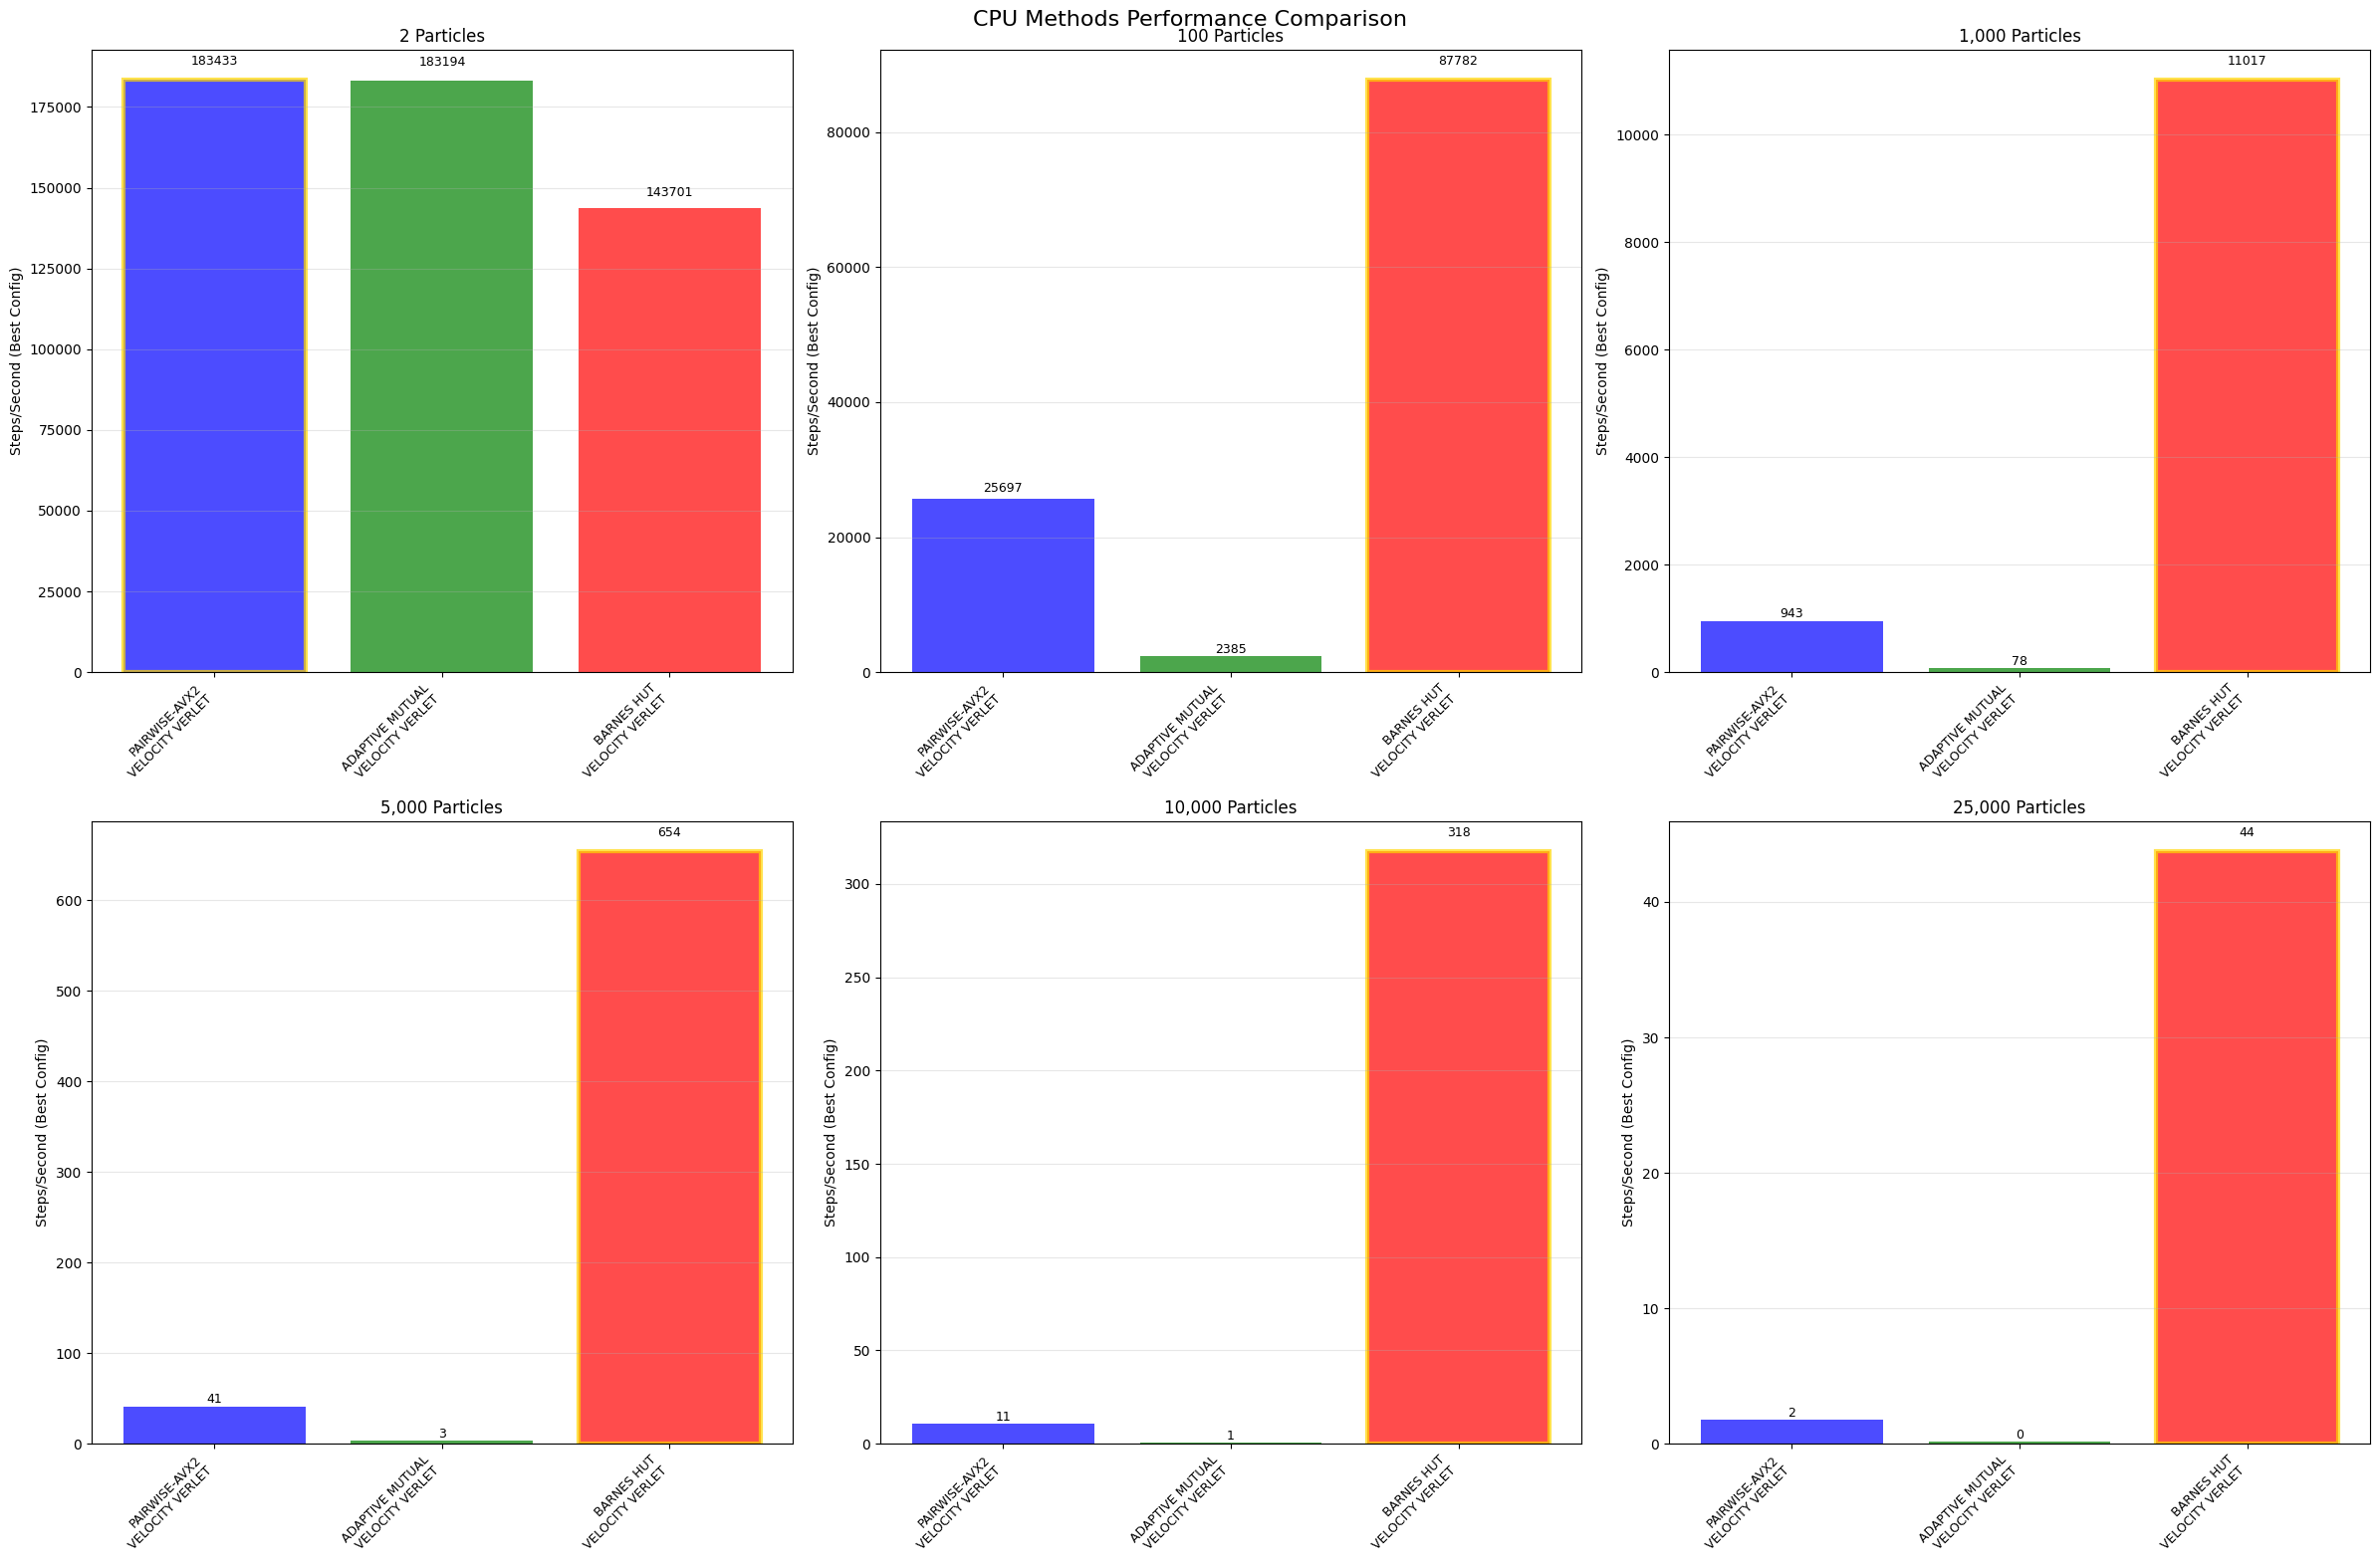

✅ Grafico 2: Confronto metodi completato


In [10]:
# 2. METODI COMPARISON (secondo grafico)
if data_available:
    
    fig, axes = plt.subplots(2, 3, figsize=(24, 16))
    fig.suptitle('CPU Methods Performance Comparison', fontsize=16)
    
    print("\n=== GRAFICO 2: CONFRONTO METODI ===")
    
    # Seleziona numeri di particelle e threads per confronto
    comparison_particles = [2, 100, 1000, 5000, 10000, 25000]
    
    for idx, particles in enumerate(comparison_particles):
        if idx >= 6:
            break
            
        ax = axes[idx // 3, idx % 3]
        
        particle_data = df[df['NumParticles'] == particles]
        
        if particle_data.empty:
            ax.text(0.5, 0.5, f'{particles:,} particles\nNo data', 
                   ha='center', va='center', transform=ax.transAxes)
            continue
        
        print(f"\n{particles:,} particles:")
        
        # Raggruppa per metodo e trova la migliore configurazione (threads)
        method_performances = []
        method_names = []
        method_colors = []
        
        color_map = {'PAIRWISE_AVX2/FP32': 'blue', 'ADAPTIVE_MUTUAL': 'green', 
                    'BARNES_HUT': 'red', 'PAIRWISE': 'orange'}
        
        for (force, integration) in main_combinations:
            combo_data = particle_data[(particle_data['ForceMethod'] == force) & 
                                      (particle_data['IntegrationMethod'] == integration)]
            
            if not combo_data.empty:
                # Trova la migliore configurazione di thread per questo metodo
                best_config = combo_data.loc[combo_data['MeanStepsPerSecond'].idxmax()]
                
                method_name = f"{force.replace('_AVX2/FP32', '-AVX2').replace('_', ' ')}\n{integration.replace('_', ' ')}"
                method_performances.append(best_config['MeanStepsPerSecond'])
                method_names.append(method_name)
                
                base_color = color_map.get(force, 'gray')
                method_colors.append(base_color)
                
                print(f"  {force}+{integration}: {best_config['MeanStepsPerSecond']:.0f} steps/sec "
                      f"({best_config['NumThreads']} threads)")
        
        if method_performances:
            # Bar plot con errori
            bars = ax.bar(range(len(method_names)), method_performances, 
                         color=method_colors, alpha=0.7, width=0.8)
            
            # Aggiungi valori sulle barre
            for bar, perf in zip(bars, method_performances):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + height*0.02,
                       f'{perf:.0f}', ha='center', va='bottom', fontsize=9)
            
            ax.set_xticks(range(len(method_names)))
            ax.set_xticklabels(method_names, rotation=45, ha='right', fontsize=9)
            ax.set_ylabel('Steps/Second (Best Config)')
            ax.set_title(f'{particles:,} Particles')
            ax.grid(True, alpha=0.3, axis='y')
            
            # Highlight il metodo migliore
            best_idx = method_performances.index(max(method_performances))
            bars[best_idx].set_edgecolor('gold')
            bars[best_idx].set_linewidth(3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Grafico 2: Confronto metodi completato")


=== GRAFICO 3: EFFICIENCY ANALYSIS ===


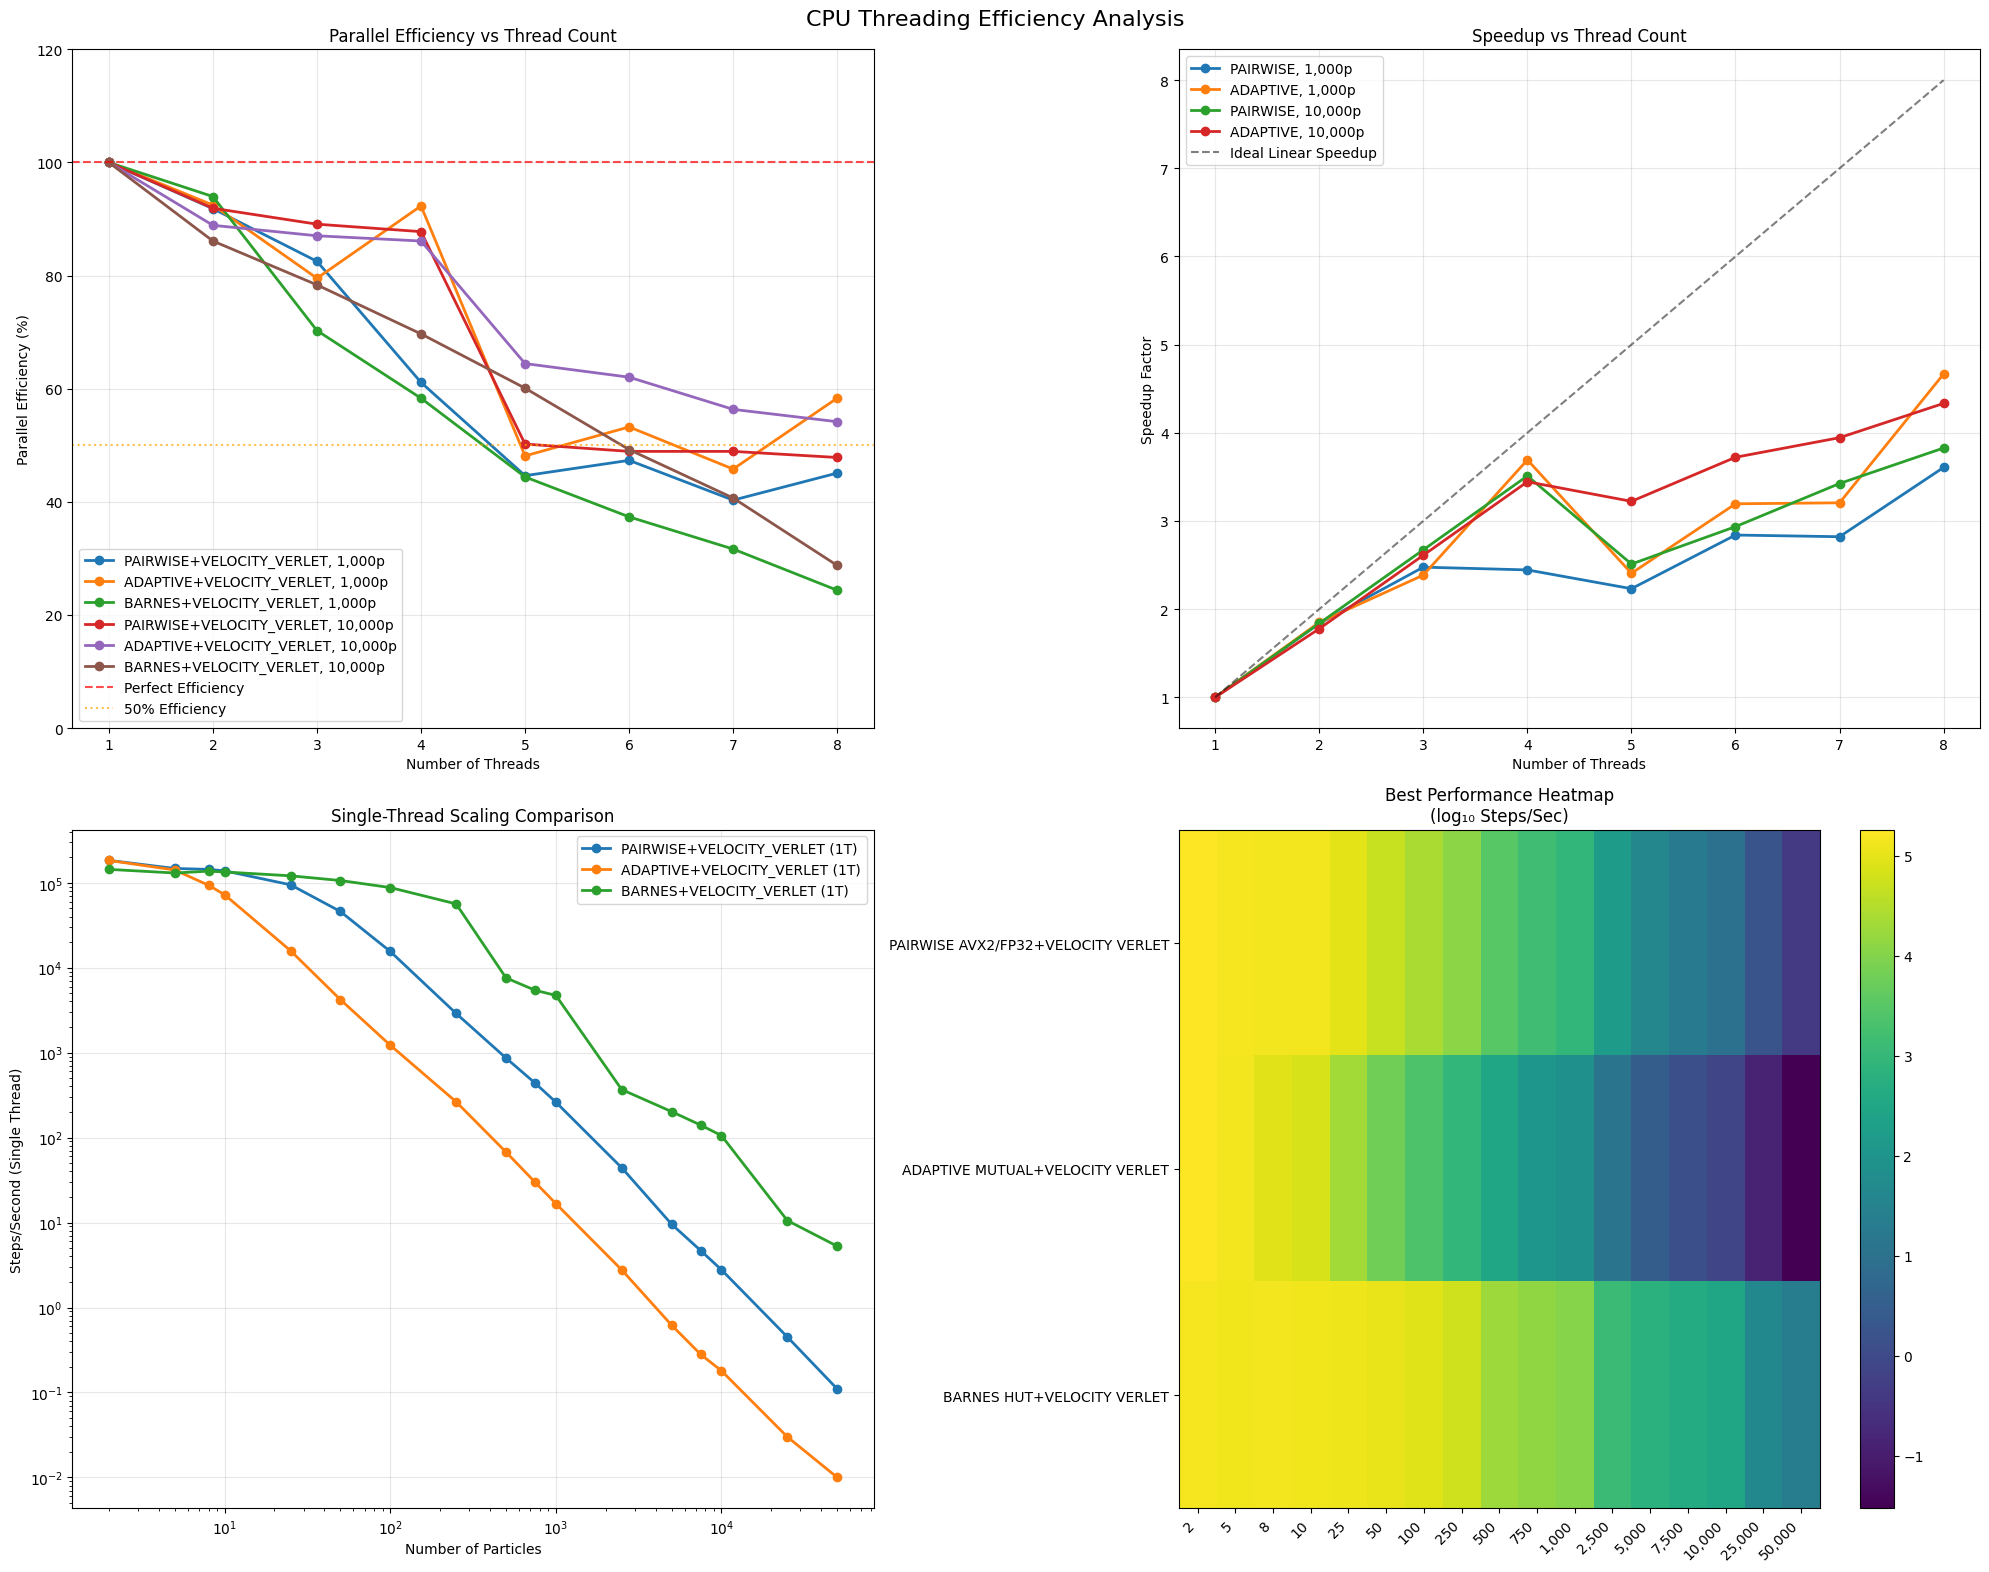

✅ Grafico 3: Efficiency analysis completato


In [11]:
# 3. EFFICIENCY ANALYSIS (terzo grafico)
if data_available:
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('CPU Threading Efficiency Analysis', fontsize=16)
    
    print("\n=== GRAFICO 3: EFFICIENCY ANALYSIS ===")
    
    # Plot 1: Parallel Efficiency vs Threads (for representative methods)
    ax1 = axes[0, 0]
    
    representative_methods = main_combinations[:3]  # Prendi i primi 3 metodi più completi
    efficiency_data = {}
    
    for particles in [1000, 10000]:
        for force_method, int_method in representative_methods:
            method_data = df[(df['ForceMethod'] == force_method) & 
                            (df['IntegrationMethod'] == int_method) & 
                            (df['NumParticles'] == particles)]
            
            if not method_data.empty:
                method_data_sorted = method_data.sort_values('NumThreads')
                
                # Calcola parallel efficiency
                baseline = method_data_sorted[method_data_sorted['NumThreads'] == 1]['MeanStepsPerSecond']
                if not baseline.empty:
                    baseline_perf = baseline.iloc[0]
                    
                    efficiencies = []
                    thread_counts = []
                    
                    for _, row in method_data_sorted.iterrows():
                        threads = row['NumThreads']
                        actual_speedup = row['MeanStepsPerSecond'] / baseline_perf
                        efficiency = (actual_speedup / threads) * 100  # Percentage
                        
                        efficiencies.append(efficiency)
                        thread_counts.append(threads)
                    
                    method_label = f"{force_method.split('_')[0]}+{int_method}, {particles:,}p"
                    ax1.plot(thread_counts, efficiencies, 'o-', 
                            label=method_label, linewidth=2, markersize=6)
    
    ax1.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='Perfect Efficiency')
    ax1.axhline(y=50, color='orange', linestyle=':', alpha=0.7, label='50% Efficiency')
    ax1.set_xlabel('Number of Threads')
    ax1.set_ylabel('Parallel Efficiency (%)')
    ax1.set_title('Parallel Efficiency vs Thread Count')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 120)
    
    # Plot 2: Speedup vs Threads
    ax2 = axes[0, 1]
    
    for particles in [1000, 10000]:
        for force_method, int_method in representative_methods[:2]:  # Limita per leggibilità
            method_data = df[(df['ForceMethod'] == force_method) & 
                            (df['IntegrationMethod'] == int_method) & 
                            (df['NumParticles'] == particles)]
            
            if not method_data.empty:
                method_data_sorted = method_data.sort_values('NumThreads')
                baseline = method_data_sorted[method_data_sorted['NumThreads'] == 1]['MeanStepsPerSecond']
                
                if not baseline.empty:
                    baseline_perf = baseline.iloc[0]
                    speedups = method_data_sorted['MeanStepsPerSecond'] / baseline_perf
                    
                    method_label = f"{force_method.split('_')[0]}, {particles:,}p"
                    ax2.plot(method_data_sorted['NumThreads'], speedups, 'o-', 
                            label=method_label, linewidth=2, markersize=6)
    
    # Linear speedup reference
    max_threads = df['NumThreads'].max()
    thread_range = range(1, max_threads + 1)
    ax2.plot(thread_range, thread_range, 'k--', alpha=0.5, label='Ideal Linear Speedup')
    
    ax2.set_xlabel('Number of Threads')
    ax2.set_ylabel('Speedup Factor')
    ax2.set_title('Speedup vs Thread Count')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Method Scaling Comparison (log-log per vedere N-scaling)
    ax3 = axes[1, 0]
    
    # Single-thread performance scaling
    for force_method, int_method in representative_methods:
        single_thread_data = df[(df['ForceMethod'] == force_method) & 
                               (df['IntegrationMethod'] == int_method) & 
                               (df['NumThreads'] == 1)]
        
        if len(single_thread_data) >= 3:
            single_thread_sorted = single_thread_data.sort_values('NumParticles')
            
            method_label = f"{force_method.split('_')[0]}+{int_method} (1T)"
            ax3.loglog(single_thread_sorted['NumParticles'], 
                      single_thread_sorted['MeanStepsPerSecond'], 
                      'o-', label=method_label, linewidth=2, markersize=6)
    
    ax3.set_xlabel('Number of Particles')
    ax3.set_ylabel('Steps/Second (Single Thread)')
    ax3.set_title('Single-Thread Scaling Comparison')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Best Configuration Heatmap
    ax4 = axes[1, 1]
    
    # Crea heatmap delle migliori configurazioni
    particles_range = sorted(df['NumParticles'].unique())
    methods_range = [f"{f}+{i}" for f, i in main_combinations[:5]]  # Limita per visualizzazione
    
    heatmap_data = np.zeros((len(methods_range), len(particles_range)))
    
    for i, (force_method, int_method) in enumerate(main_combinations[:5]):
        for j, particles in enumerate(particles_range):
            method_data = df[(df['ForceMethod'] == force_method) & 
                            (df['IntegrationMethod'] == int_method) & 
                            (df['NumParticles'] == particles)]
            
            if not method_data.empty:
                best_perf = method_data['MeanStepsPerSecond'].max()
                heatmap_data[i, j] = np.log10(best_perf) if best_perf > 0 else 0
    
    im = ax4.imshow(heatmap_data, cmap='viridis', aspect='auto')
    ax4.set_xticks(range(len(particles_range)))
    ax4.set_xticklabels([f'{p:,}' for p in particles_range], rotation=45, ha='right')
    ax4.set_yticks(range(len(methods_range)))
    ax4.set_yticklabels([m.replace('_', ' ') for m in methods_range])
    ax4.set_title('Best Performance Heatmap\n(log₁₀ Steps/Sec)')
    plt.colorbar(im, ax=ax4)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Grafico 3: Efficiency analysis completato")

In [12]:
# 4. STATISTICHE RIASSUNTIVE E INSIGHTS
if data_available:
    
    print("\n=== ANALISI STATISTICHE RIASSUNTIVE ===")
    
    # Thread efficiency summary
    print("THREAD EFFICIENCY SUMMARY:")
    
    efficiency_summary = []
    
    for force_method, int_method in main_combinations:
        for particles in [1000, 5000, 10000]:
            method_data = df[(df['ForceMethod'] == force_method) & 
                            (df['IntegrationMethod'] == int_method) & 
                            (df['NumParticles'] == particles)]
            
            if len(method_data) > 1:
                baseline = method_data[method_data['NumThreads'] == 1]['MeanStepsPerSecond']
                if not baseline.empty:
                    baseline_perf = baseline.iloc[0]
                    
                    # Trova la migliore configurazione multi-thread
                    best_multi = method_data[method_data['NumThreads'] > 1]
                    if not best_multi.empty:
                        best_perf = best_multi['MeanStepsPerSecond'].max()
                        best_threads = best_multi.loc[best_multi['MeanStepsPerSecond'].idxmax(), 'NumThreads']
                        
                        speedup = best_perf / baseline_perf
                        efficiency = (speedup / best_threads) * 100
                        
                        efficiency_summary.append({
                            'Method': f"{force_method.split('_')[0]}+{int_method}",
                            'Particles': particles,
                            'Best_Threads': best_threads,
                            'Speedup': speedup,
                            'Efficiency': efficiency,
                            'Single_Perf': baseline_perf,
                            'Multi_Perf': best_perf
                        })
    
    if efficiency_summary:
        efficiency_df = pd.DataFrame(efficiency_summary)
        
        # Raggruppa per metodo
        print("\nPer metodo (media su diverse N):")
        method_stats = efficiency_df.groupby('Method').agg({
            'Speedup': ['mean', 'std', 'max'],
            'Efficiency': ['mean', 'std', 'min'],
            'Best_Threads': 'median'
        }).round(2)
        
        print(method_stats.to_string())
        
        # Top performers
        print(f"\nTOP 5 SPEEDUPS:")
        top_speedups = efficiency_df.nlargest(5, 'Speedup')
        for _, row in top_speedups.iterrows():
            print(f"  {row['Method']}, {row['Particles']:,}p: {row['Speedup']:.2f}x ({row['Best_Threads']} threads, {row['Efficiency']:.1f}% eff)")
        
        # Scaling insights
        print(f"\nSCALING INSIGHTS:")
        
        # Analizza come cambia l'efficiency con N
        for method in efficiency_df['Method'].unique():
            method_data = efficiency_df[efficiency_df['Method'] == method].sort_values('Particles')
            if len(method_data) >= 3:
                particles = method_data['Particles'].values
                efficiencies = method_data['Efficiency'].values
                
                # Linear fit per vedere il trend
                slope, intercept, r_value, _, _ = stats.linregress(np.log10(particles), efficiencies)
                
                print(f"  {method}: efficiency trend = {slope:.2f}%/decade, R² = {r_value**2:.3f}")
    
    # Metodo comparison per numero di particelle
    print(f"\n=== BEST METHOD PER NUMERO DI PARTICELLE ===")
    
    best_by_particles = {}
    
    for particles in sorted(df['NumParticles'].unique()):
        particle_data = df[df['NumParticles'] == particles]
        
        method_performances = []
        
        for force_method, int_method in main_combinations:
            combo_data = particle_data[(particle_data['ForceMethod'] == force_method) & 
                                      (particle_data['IntegrationMethod'] == int_method)]
            
            if not combo_data.empty:
                best_perf = combo_data['MeanStepsPerSecond'].max()
                best_config = combo_data.loc[combo_data['MeanStepsPerSecond'].idxmax()]
                
                method_performances.append({
                    'Method': f"{force_method}+{int_method}",
                    'Performance': best_perf,
                    'Threads': best_config['NumThreads'],
                    'CV': best_config['CVStepsPerSecond']
                })
        
        if method_performances:
            best_method = max(method_performances, key=lambda x: x['Performance'])
            best_by_particles[particles] = best_method
            
            print(f"{particles:>6,} particles: {best_method['Method']} "
                  f"({best_method['Performance']:.0f} steps/sec, {best_method['Threads']}T, "
                  f"CV={best_method['CV']*100:.1f}%)")
    
    # Transition points
    print(f"\nTRANSITION POINTS:")
    prev_method = None
    for particles, method_info in best_by_particles.items():
        current_method = method_info['Method']
        if prev_method and prev_method != current_method:
            print(f"  {particles:,} particles: {prev_method} → {current_method}")
        prev_method = current_method
    
    print("\n✅ Analisi CPU methods scaling completata!")
    print("🎯 I 3 grafici mostrano: scalabilità thread, confronto metodi, analisi efficiency")


=== ANALISI STATISTICHE RIASSUNTIVE ===
THREAD EFFICIENCY SUMMARY:

Per metodo (media su diverse N):
                         Speedup             Efficiency               Best_Threads
                            mean   std   max       mean    std    min       median
Method                                                                            
ADAPTIVE+VELOCITY_VERLET    4.65  0.30  4.94      58.07   3.77  54.17          8.0
BARNES+VELOCITY_VERLET      2.86  0.47  3.23      52.94  10.88  40.42          5.0
PAIRWISE+VELOCITY_VERLET    3.91  0.36  4.30      48.91   4.46  45.09          8.0

TOP 5 SPEEDUPS:
  ADAPTIVE+VELOCITY_VERLET, 5,000p: 4.94x (8 threads, 61.7% eff)
  ADAPTIVE+VELOCITY_VERLET, 1,000p: 4.67x (8 threads, 58.3% eff)
  ADAPTIVE+VELOCITY_VERLET, 10,000p: 4.33x (8 threads, 54.2% eff)
  PAIRWISE+VELOCITY_VERLET, 5,000p: 4.30x (8 threads, 53.8% eff)
  PAIRWISE+VELOCITY_VERLET, 10,000p: 3.83x (8 threads, 47.8% eff)

SCALING INSIGHTS:
  PAIRWISE+VELOCITY_VERLET: efficienc